**ESERCIZIO SMOTE DIOMEDI 11-09**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

**Punto 1**

In [8]:
data = pd.read_csv('../datasets/creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']


**Punto 2**

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Punto 3**

In [5]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
scaler = StandardScaler()

**Punto 3.A + 4**

In [5]:
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962



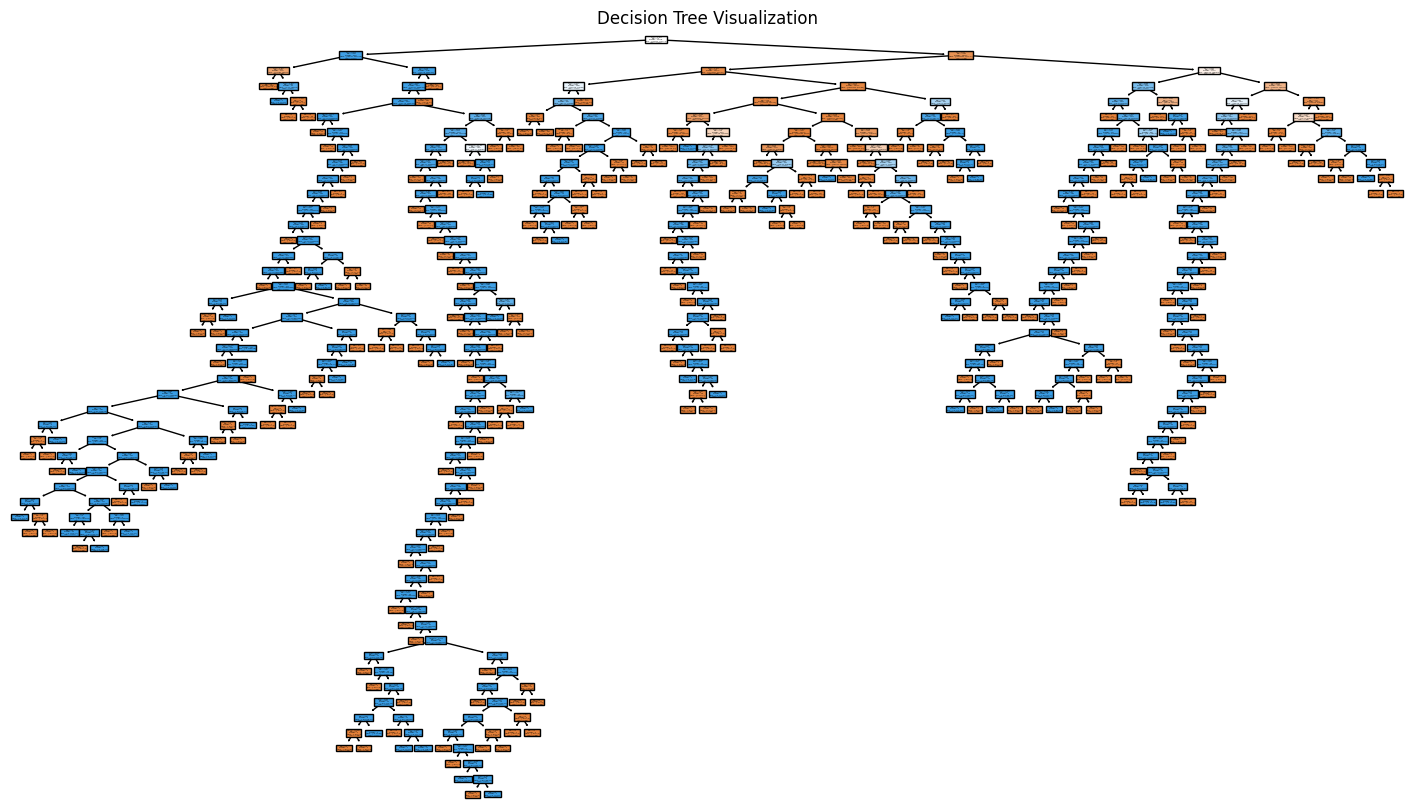

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=X.columns, class_names=["legit", "fraud"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

**Punto 3.B + 4**

In [12]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**Punto 3.C + 4**

In [6]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [14]:
tree.fit(x_resampled, y_resampled)
y_pred_tree_resampled = tree.predict(x_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_tree_resampled))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [7]:
rf.fit(x_resampled, y_resampled)
y_pred_rf_resampled = rf.predict(x_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf_resampled))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

